<a href="https://colab.research.google.com/github/venkateshblks/project/blob/main/predictive_maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

##1.. EDA

In [3]:
df=pd.read_excel('Maintenance.xlsx')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
df = df.drop(["UDI",'Product ID'],axis=1)

In [6]:
print(df.nunique())

Type                         3
Air temperature [K]         93
Process temperature [K]     82
Rotational speed [rpm]     941
Torque [Nm]                577
Tool wear [min]            246
Machine failure              2
TWF                          2
HDF                          2
PWF                          2
OSF                          2
RNF                          2
dtype: int64


In [7]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [8]:
#Handling missing values
df.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [9]:
df[df.duplicated()]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF


In [10]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [11]:
df1=df.rename(columns={"Air temperature [K]": "air_Temp", "Process temperature [K]": "process_Temp",
                   'Rotational speed [rpm]':'R_speed_rpm','Torque [Nm]':'torque_nm','Tool wear [min]':'tool_wear'})
df1

,Type,air_Temp,process_Temp,R_speed_rpm,torque_nm,tool_wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


## 2..	Data Visualization

<Axes: xlabel='Type', ylabel='count'>

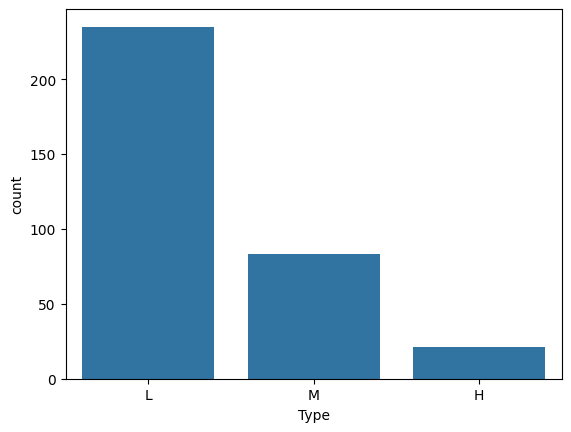

In [12]:
sns.countplot(data=df[df['Machine failure']==1],x='Type')

In [13]:
import plotly.express as px
px.scatter_3d(df, x='Tool wear [min]', y='Torque [Nm]', z='Rotational speed [rpm]',
              color='Machine failure')

<Axes: xlabel='Machine failure', ylabel='count'>

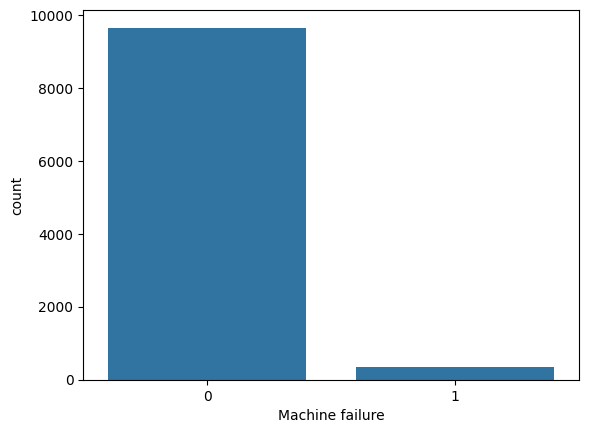

In [14]:
sns.countplot(data=df,x='Machine failure')

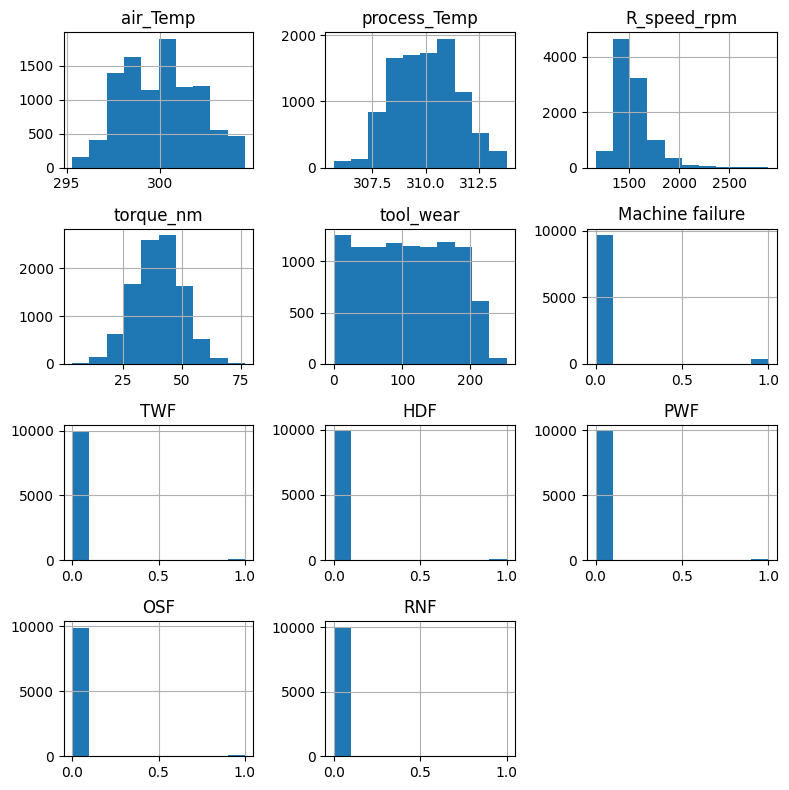

In [15]:
#Data Visualization
#Histogram
df1.hist(figsize=(8,8))
plt.tight_layout()

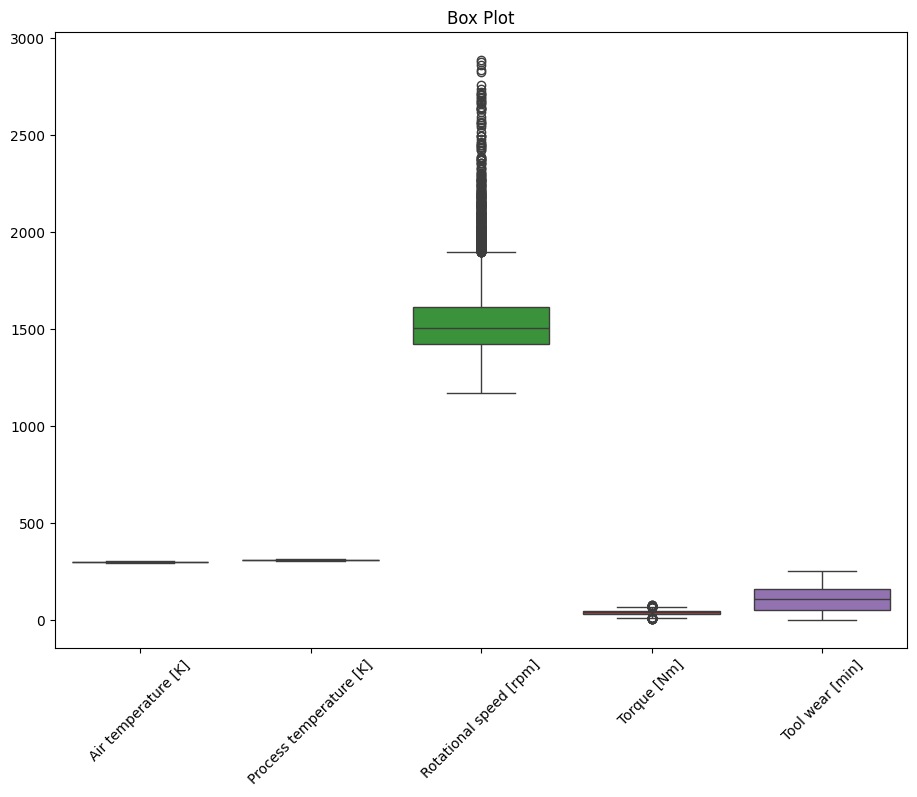

In [16]:
num_col = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
                     'Torque [Nm]', 'Tool wear [min]']

plt.figure(figsize=(11,8))
sns.boxplot(data=df[num_col])
plt.title('Box Plot')
plt.xticks(rotation=45)
plt.show()

In [17]:
df1.columns

Index(['Type', 'air_Temp', 'process_Temp', 'R_speed_rpm', 'torque_nm',
       'tool_wear', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

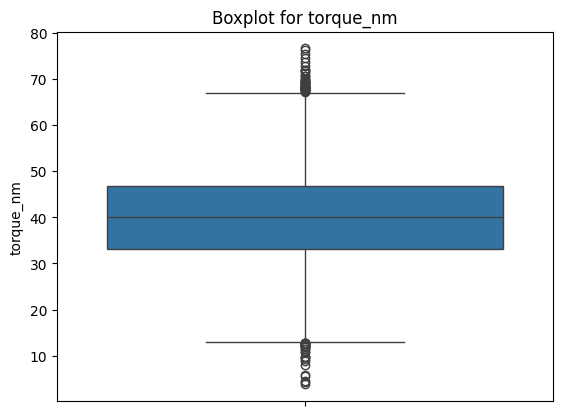

In [18]:
sns.boxplot(y=df1['torque_nm'])
plt.title('Boxplot for torque_nm')
plt.show()

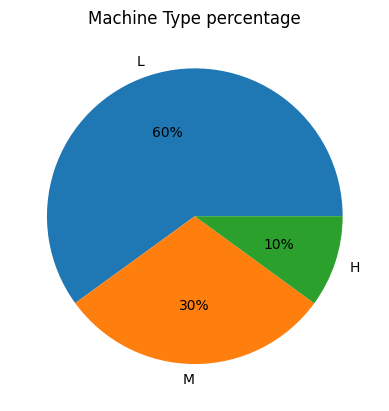

In [19]:
# Pie chart of Type percentage
value = df1['Type'].value_counts()
Type_percentage = 100*value/df1.Type.shape[0]
labels = Type_percentage.index.array
x = Type_percentage.array
plt.pie(x, labels = labels, colors=sns.color_palette('tab10')[0:3], autopct='%.0f%%')
plt.title('Machine Type percentage')
plt.show()

## 3..Feature engineering

In [20]:
df1["Type"] = df1["Type"].replace("L",0)
df1["Type"] = df1["Type"].replace("M",1)
df1["Type"] = df1["Type"].replace("H",2)
df1

,Type,air_Temp,process_Temp,R_speed_rpm,torque_nm,tool_wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,2,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,1,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,2,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [21]:
#Handling Outliers
from scipy.stats import zscore
numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

df_zscores=df[numerical_columns].apply(zscore)
df_zscores

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588
...,...,...,...,...,...
9995,-0.602417,-1.082162,0.363820,-1.052012,-1.476034
9996,-0.552421,-1.082162,0.520005,-0.821283,-1.428902
9997,-0.502425,-0.947360,0.592519,-0.660777,-1.350349
9998,-0.502425,-0.879959,-0.729472,0.854005,-1.303217


In [22]:
threshold=3
outliers=(abs(df_zscores)>threshold).any(axis=1)
df1[outliers]

,Type,air_Temp,process_Temp,R_speed_rpm,torque_nm,tool_wear,Machine failure,TWF,HDF,PWF,OSF,RNF
50,0,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
194,1,298.2,308.5,2678,10.7,86,1,0,0,1,0,0
298,2,297.9,308.5,2129,18.7,126,0,0,0,0,0,0
305,0,297.8,308.4,2129,19.2,148,0,0,0,0,0,0
344,1,297.5,308.2,2448,13.8,29,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9758,0,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9832,0,298.4,309.2,2118,17.7,210,0,0,0,0,0,0
9849,0,298.6,309.4,2312,15.5,44,0,0,0,0,0,0
9865,1,298.9,309.8,2450,13.9,89,0,0,0,0,0,0


In [23]:
df2 = df1[~outliers]
print("Data without outliers:")
df2

Data without outliers:


,Type,air_Temp,process_Temp,R_speed_rpm,torque_nm,tool_wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,2,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,1,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,2,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


## 4..	Model building

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


In [25]:
X=df2.drop(['Machine failure'],axis=1)
y=df2['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train

,Type,air_Temp,process_Temp,R_speed_rpm,torque_nm,tool_wear,TWF,HDF,PWF,OSF,RNF
5917,0,300.6,310.2,1341,52.6,21,0,0,0,0,0
5631,0,302.8,312.2,1515,36.8,162,0,0,0,0,0
8997,1,297.1,307.9,1609,38.9,166,0,0,0,0,0
4300,1,301.7,310.1,1644,34.6,5,0,0,0,0,0
8747,0,297.3,308.5,1504,42.0,142,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5841,1,301.3,311.1,1678,30.7,34,0,0,0,0,0
5288,0,303.8,313.2,1531,39.4,159,0,0,0,0,0
5492,1,302.9,312.4,1334,50.9,5,0,0,0,0,0
873,0,295.9,306.4,1892,21.7,72,0,0,0,0,0


In [26]:
X_test.shape

(2947, 11)

In [27]:
def evaluate_model(model, X_test, y_test, model_name, metrics_df):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = None
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        'ROC-AUC': [roc_auc]
    })
    if new_row.Model.iloc[0] not  in metrics_df['Model'].values:
      metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)
    print(classification_report(y_test, y_pred, zero_division=1))
    print("-" * 30)
    return metrics_df

In [28]:
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'])

### Logistic Regression

In [29]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [30]:
metrics_df = evaluate_model(log_reg, X_test, y_test, 'Logistic Regression', metrics_df)
metrics_df

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2858
           1       1.00      0.98      0.99        89

    accuracy                           1.00      2947
   macro avg       1.00      0.99      0.99      2947
weighted avg       1.00      1.00      1.00      2947

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.999321,1.0,0.977528,0.988636,0.996827


### Decision Tree

In [31]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
metrics_df = evaluate_model(decision_tree, X_test, y_test, 'Decision Tree', metrics_df)
metrics_df

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2858
           1       0.92      0.99      0.95        89

    accuracy                           1.00      2947
   macro avg       0.96      0.99      0.97      2947
weighted avg       1.00      1.00      1.00      2947

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.999321,1.000000,0.977528,0.988636,0.996827
1,Decision Tree,0.996946,0.916667,0.988764,0.951351,0.992982


### Random Forest


In [33]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
metrics_df=evaluate_model(random_forest, X_test, y_test, 'Random Forest', metrics_df)
metrics_df

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2858
           1       1.00      0.99      0.99        89

    accuracy                           1.00      2947
   macro avg       1.00      0.99      1.00      2947
weighted avg       1.00      1.00      1.00      2947

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.999321,1.000000,0.977528,0.988636,0.996827
1,Decision Tree,0.996946,0.916667,0.988764,0.951351,0.992982
2,Random Forest,0.999661,1.000000,0.988764,0.994350,0.999198


### Support Vector Machine (SVM)

In [35]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
evaluate_model(svm, X_test, y_test, 'SVM', metrics_df)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2858
           1       1.00      0.00      0.00        89

    accuracy                           0.97      2947
   macro avg       0.98      0.50      0.49      2947
weighted avg       0.97      0.97      0.95      2947

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.999321,1.000000,0.977528,0.988636,0.996827
1,Decision Tree,0.996946,0.916667,0.988764,0.951351,0.992982
2,Random Forest,0.999661,1.000000,0.988764,0.994350,0.999198
3,SVM,0.969800,0.000000,0.000000,0.000000,0.669400


### k-Nearest Neighbors (k-NN)


In [36]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
metrics_df=evaluate_model(knn, X_test, y_test, 'k-NN', metrics_df)
metrics_df

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2858
           1       0.78      0.16      0.26        89

    accuracy                           0.97      2947
   macro avg       0.88      0.58      0.62      2947
weighted avg       0.97      0.97      0.96      2947

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.999321,1.000000,0.977528,0.988636,0.996827
1,Decision Tree,0.996946,0.916667,0.988764,0.951351,0.992982
2,Random Forest,0.999661,1.000000,0.988764,0.994350,0.999198
3,k-NN,0.973193,0.777778,0.157303,0.261682,0.774679


### Gradient Boosting


In [38]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier()

In [39]:
metrics_df=evaluate_model(gradient_boosting, X_test, y_test, 'Gradient Boosting', metrics_df)
metrics_df

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2858
           1       0.97      0.99      0.98        89

    accuracy                           1.00      2947
   macro avg       0.98      0.99      0.99      2947
weighted avg       1.00      1.00      1.00      2947

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.999321,1.000000,0.977528,0.988636,0.996827
1,Decision Tree,0.996946,0.916667,0.988764,0.951351,0.992982
2,Random Forest,0.999661,1.000000,0.988764,0.994350,0.999198
3,k-NN,0.973193,0.777778,0.157303,0.261682,0.774679
4,Gradient Boosting,0.998643,0.967033,0.988764,0.977778,0.992526


### Neural Network

**MultiLayerPerceptron**

In [40]:
neural_network = MLPClassifier(max_iter=1000)
neural_network.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

In [41]:
metrics_df=evaluate_model(neural_network, X_test, y_test, 'Neural Network', metrics_df)
metrics_df

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2858
           1       1.00      0.99      0.99        89

    accuracy                           1.00      2947
   macro avg       1.00      0.99      1.00      2947
weighted avg       1.00      1.00      1.00      2947

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.999321,1.000000,0.977528,0.988636,0.996827
1,Decision Tree,0.996946,0.916667,0.988764,0.951351,0.992982
2,Random Forest,0.999661,1.000000,0.988764,0.994350,0.999198
3,k-NN,0.973193,0.777778,0.157303,0.261682,0.774679
4,Gradient Boosting,0.998643,0.967033,0.988764,0.977778,0.992526
5,Neural Network,0.999661,1.000000,0.988764,0.994350,0.994795


### XGBoost

In [42]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
metrics_df=evaluate_model(xgb, X_test, y_test, 'XGBoost', metrics_df)
metrics_df

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2858
           1       1.00      0.99      0.99        89

    accuracy                           1.00      2947
   macro avg       1.00      0.99      1.00      2947
weighted avg       1.00      1.00      1.00      2947

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.999321,1.000000,0.977528,0.988636,0.996827
1,Decision Tree,0.996946,0.916667,0.988764,0.951351,0.992982
2,Random Forest,0.999661,1.000000,0.988764,0.994350,0.999198
3,k-NN,0.973193,0.777778,0.157303,0.261682,0.774679
4,Gradient Boosting,0.998643,0.967033,0.988764,0.977778,0.992526
5,Neural Network,0.999661,1.000000,0.988764,0.994350,0.994795
6,XGBoost,0.999661,1.000000,0.988764,0.994350,0.996017


In [44]:
metrics_df.sort_values(by=["Accuracy", "ROC-AUC"], ascending=[False, False])

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
2,Random Forest,0.999661,1.000000,0.988764,0.994350,0.999198
6,XGBoost,0.999661,1.000000,0.988764,0.994350,0.996017
5,Neural Network,0.999661,1.000000,0.988764,0.994350,0.994795
0,Logistic Regression,0.999321,1.000000,0.977528,0.988636,0.996827
4,Gradient Boosting,0.998643,0.967033,0.988764,0.977778,0.992526
1,Decision Tree,0.996946,0.916667,0.988764,0.951351,0.992982
3,k-NN,0.973193,0.777778,0.157303,0.261682,0.774679


**Based on the above data, we can conclude that Random Forest	 is a better model than all the others**

## 5..Hyperparameter tuning

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgb_classifier = XGBClassifier()

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

In [51]:
# Get the best hyperparameters
best_params = grid_search.best_params_
best_params

{'colsample_bytree': 0.6,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'subsample': 0.8}

In [52]:
best_xgb_classifier = XGBClassifier( **best_params)
best_xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
metrics_df=evaluate_model(best_xgb_classifier, X_test, y_test, 'best xgb classifier', metrics_df)
metrics_df

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2858
           1       1.00      0.99      0.99        89

    accuracy                           1.00      2947
   macro avg       1.00      0.99      1.00      2947
weighted avg       1.00      1.00      1.00      2947

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.999321,1.000000,0.977528,0.988636,0.996827
1,Decision Tree,0.996946,0.916667,0.988764,0.951351,0.992982
2,Random Forest,0.999661,1.000000,0.988764,0.994350,0.999198
3,k-NN,0.973193,0.777778,0.157303,0.261682,0.774679
4,Gradient Boosting,0.998643,0.967033,0.988764,0.977778,0.992526
5,Neural Network,0.999661,1.000000,0.988764,0.994350,0.994795
6,XGBoost,0.999661,1.000000,0.988764,0.994350,0.996017
7,best xgb classifier,0.999661,1.000000,0.988764,0.994350,0.995998


In [55]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_depth': [None, 10, 20],         # Maximum number of levels in tree
    'min_samples_split': [2, 5],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],           # Minimum number of samples required at each leaf node

}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [56]:
# Get the best hyperparameters
best_params = grid_search.best_params_
best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [59]:
best_rf_classifier = RandomForestClassifier( **best_params)
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [60]:
metrics_df=evaluate_model(best_rf_classifier, X_test, y_test, 'best random foresr classifier', metrics_df)
metrics_df

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2858
           1       1.00      0.99      0.99        89

    accuracy                           1.00      2947
   macro avg       1.00      0.99      1.00      2947
weighted avg       1.00      1.00      1.00      2947

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.999321,1.000000,0.977528,0.988636,0.996827
1,Decision Tree,0.996946,0.916667,0.988764,0.951351,0.992982
2,Random Forest,0.999661,1.000000,0.988764,0.994350,0.999198
3,k-NN,0.973193,0.777778,0.157303,0.261682,0.774679
4,Gradient Boosting,0.998643,0.967033,0.988764,0.977778,0.992526
5,Neural Network,0.999661,1.000000,0.988764,0.994350,0.994795
6,XGBoost,0.999661,1.000000,0.988764,0.994350,0.996017
7,best xgb classifier,0.999661,1.000000,0.988764,0.994350,0.995998
8,best random foresr classifier,0.999661,1.000000,0.988764,0.994350,0.999393


## 6..Model evaluation

In [61]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.999321,1.000000,0.977528,0.988636,0.996827
1,Decision Tree,0.996946,0.916667,0.988764,0.951351,0.992982
2,Random Forest,0.999661,1.000000,0.988764,0.994350,0.999198
3,k-NN,0.973193,0.777778,0.157303,0.261682,0.774679
4,Gradient Boosting,0.998643,0.967033,0.988764,0.977778,0.992526
5,Neural Network,0.999661,1.000000,0.988764,0.994350,0.994795
6,XGBoost,0.999661,1.000000,0.988764,0.994350,0.996017
7,best xgb classifier,0.999661,1.000000,0.988764,0.994350,0.995998
8,best random foresr classifier,0.999661,1.000000,0.988764,0.994350,0.999393


In [62]:
metrics_df.sort_values(by=["Accuracy", "ROC-AUC"], ascending=[False, False])

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
8,best random foresr classifier,0.999661,1.000000,0.988764,0.994350,0.999393
2,Random Forest,0.999661,1.000000,0.988764,0.994350,0.999198
6,XGBoost,0.999661,1.000000,0.988764,0.994350,0.996017
7,best xgb classifier,0.999661,1.000000,0.988764,0.994350,0.995998
5,Neural Network,0.999661,1.000000,0.988764,0.994350,0.994795
0,Logistic Regression,0.999321,1.000000,0.977528,0.988636,0.996827
4,Gradient Boosting,0.998643,0.967033,0.988764,0.977778,0.992526
1,Decision Tree,0.996946,0.916667,0.988764,0.951351,0.992982
3,k-NN,0.973193,0.777778,0.157303,0.261682,0.774679


**After Hyperparameter tuning with GridSearchCV, the best random forest classifier gave better results than all other models**

In [63]:
# save the model to disk
from pickle import load,dump
dump(best_rf_classifier, open('Model.sav', 'wb'))

In [ ]:
#Model deployment link -- https://testweb-db522b9836c4.herokuapp.com/